In [179]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
from matplotlib.colors import LinearSegmentedColormap
from scipy.optimize import minimize

warnings.filterwarnings('ignore')

In [180]:
titres = tickers = [
    "TTE.PA",      # TotalEnergies
    "BN.PA",       # Danone
    "SAN.PA",      # Sanofi
    "BNP.PA",      # BNP Paribas
    "ENGI.PA",     # Engie
    "ORA.PA",      # Orange
    "MC.PA",       # LVMH Moet Hennessy
    "CS.PA",       # AXA
    "OR.PA",       # L'Oréal
    "GLE.PA",      # Société Générale
    "AI.PA",       # Air Liquide
    "AIR.PA",      # Airbus
    "ALO.PA",      # Alstom
    "MT.AS",       # ArcelorMittal
    "KER.PA",      # Kering
    "SGO.PA",      # Saint-Gobain
    "SU.PA",       # Schneider Electric
    "STM",         # STMicroelectronics
    "UL.PA",       # Unibail-Rodamco
    "VIE.PA",      # Veolia Environnement
    "DG.PA",       # Vinci
    "VIV.PA",      # Vivendi
    "RNO.PA",      # Renault
    "PEUG.PA",     # Peugeot (Stellantis)
    "HO.PA",       # Thales
    "ACA.PA",      # Crédit Agricole
    "EN.PA",       # Bouygues
    "LNA.PA",      # LNA Santé
    "DIM.PA",      # Sartorius Stedim Biotech
]

data = yf.download(titres, start="2010-01-01", end="2024-01-01", interval="1d") #période et fréquence des données
portfolio_returns = data['Adj Close'].pct_change().mean(axis=1) #portfolio return

[*********************100%%**********************]  29 of 29 completed


In [181]:
data.head()

Price      Adj Close                                                         \
Ticker        ACA.PA      AI.PA     AIR.PA     ALO.PA      BN.PA     BNP.PA   
Date                                                                          
2010-01-04  6.184280  35.004929  11.342544  36.186615  27.860056  26.057642   
2010-01-05  6.278311  34.304836  11.306062  36.284946  27.618328  26.007568   
2010-01-06  6.389217  34.093548  11.407407  36.502678  27.615105  26.048532   
2010-01-07  6.391629  34.052135  11.520911  36.615067  27.557091  26.503775   
2010-01-08  6.495303  34.159836  11.634419  37.331497  27.492626  27.131992   

Price                                                 ...   Volume             \
Ticker         CS.PA      DG.PA    DIM.PA      EN.PA  ...  PEUG.PA     RNO.PA   
Date                                                  ...                       
2010-01-04  7.704946  23.511446  4.119064  16.893999  ...  18060.0  3178864.0   
2010-01-05  7.833363  23.690832  4.161725  17.101631  ...  24996.0  2444195.0   
2010-01-06  7.913621  24.017262  4.119064  17.192905  ...  23119.0  4955904.0   
2010-01-07  7.824190  24.026079  4.126420  16.957888  ...  31146.0  2381513.0   
2010-01-08  7.849413  24.367210  4.141129  16.964733  ...  18807.0  2630329.0   

Price                                                                    \
Ticker         SAN.PA     SGO.PA        STM      SU.PA     TTE.PA UL.PA   
Date                                                                      
2010-01-04  6132525.0  1373226.0  1233900.0  3656756.0  5255369.0   NaN   
2010-01-05  2788497.0  1318746.0  1463700.0  3665156.0  9758572.0   NaN   
2010-01-06  2638238.0  1591851.0  1553500.0  1688460.0  4721098.0   NaN   
2010-01-07  2791429.0  1708724.0  1499100.0  3723944.0  4265108.0   NaN   
2010-01-08  2674501.0  1571982.0  1613100.0  2191678.0  4626382.0   NaN   

Price                              
Ticker         VIE.PA      VIV.PA  
Date                               
2010-01-04  2977916.0  12663456.0  
2010-01-05  3704179.0  19862959.0  
2010-01-06  4761109.0   8676043.0  
2010-01-07  4722591.0  17199772.0  
2010-01-08  5696512.0  15922802.0  

[5 rows x 174 columns]

In [182]:
# benchmark (CAC 40)

benchmark = yf.download("^FCHI", start="2010-01-01", end="2024-01-01", interval="1d")
benchmark_returns = benchmark['Adj Close'].pct_change() #benchmark return

[*********************100%%**********************]  1 of 1 completed


In [183]:
# Rendement cumulative pour obtenir les perfs cumulées

cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() * 100
cumulative_benchmark_returns = (1 + benchmark_returns).cumprod() * 100

In [184]:
# Vérifiez la longueur de la liste des tickers
print(f"Nombre de tickers : {len(titres)}")

# Vérifiez la dimension des données récupérées
print(f"Dimensions des données récupérées : {data['Adj Close'].shape}")

Nombre de tickers : 29
Dimensions des données récupérées : (3617, 29)


In [185]:
# Vérifiez si des colonnes ont des valeurs manquantes
missing_data_summary = data['Adj Close'].isnull().sum()
print("Nombre de valeurs manquantes par ticker :")
print(missing_data_summary[missing_data_summary > 0])

Nombre de valeurs manquantes par ticker :
Ticker
ACA.PA       34
AI.PA        34
AIR.PA       34
ALO.PA       34
BN.PA        34
BNP.PA       34
CS.PA        34
DG.PA        34
DIM.PA       34
EN.PA        34
ENGI.PA      34
GLE.PA       34
HO.PA        34
KER.PA       34
LNA.PA       34
MC.PA        34
MT.AS        33
OR.PA        34
ORA.PA       34
PEUG.PA      34
RNO.PA       34
SAN.PA       34
SGO.PA       34
STM          95
SU.PA        34
TTE.PA       34
UL.PA      3437
VIE.PA       34
VIV.PA       34
dtype: int64


In [186]:
# Supprimez les colonnes qui contiennent encore des valeurs NaN
data_cleaned = data['Adj Close'].dropna(axis=1)

# Vérifiez les dimensions après nettoyage
print(f"Dimensions des données après suppression des colonnes avec NaN : {data_cleaned.shape}")

Dimensions des données après suppression des colonnes avec NaN : (3617, 0)


In [187]:
# Suppression des colonnes avec un nombre significatif de valeurs manquantes (ex. UL.PA)
data_cleaned = data['Adj Close'].drop(columns=['UL.PA', 'STM'])

# Vérifiez les dimensions après suppression des colonnes problématiques
print(f"Dimensions des données après suppression des tickers avec trop de NaN : {data_cleaned.shape}")

# Appliquons une pondération équipondérée sur les tickers restants
weights = np.array([1 / len(data_cleaned.columns)] * len(data_cleaned.columns))

# Calcul des performances annuelles
initial_prices = data_cleaned.iloc[0]
final_prices = data_cleaned.iloc[-1]
annual_performance = (final_prices - initial_prices) / initial_prices

# Création du DataFrame récapitulatif
summary_df = pd.DataFrame({
    'Ticker': data_cleaned.columns,
    'Poids (%)': weights * 100,
    'Performance Annuelle (%)': annual_performance * 100
})

# Réinitialiser l'index du DataFrame pour un affichage propre
summary_df.reset_index(drop=True, inplace=True)

# Afficher le tableau récapitulatif
print(summary_df)

Dimensions des données après suppression des tickers avec trop de NaN : (3617, 27)
     Ticker  Poids (%)  Performance Annuelle (%)
0    ACA.PA   3.703704                 94.110711
1     AI.PA   3.703704                395.244810
2    AIR.PA   3.703704               1124.818727
3    ALO.PA   3.703704                -66.341145
4     BN.PA   3.703704                103.185334
5    BNP.PA   3.703704                125.041699
6     CS.PA   3.703704                260.575979
7     DG.PA   3.703704                368.901137
8    DIM.PA   3.703704               5699.247630
9     EN.PA   3.703704                 91.469204
10  ENGI.PA   3.703704                 21.988921
11   GLE.PA   3.703704                -18.705844
12    HO.PA   3.703704                407.066109
13   KER.PA   3.703704                601.633772
14   LNA.PA   3.703704                 34.472429
15    MC.PA   3.703704               1112.442301
16    MT.AS   3.703704                -51.525550
17    OR.PA   3.703704             

In [188]:
# Performance finale du portefeuille et du benchmark en pourcentage
portfolio_performance_percent = cumulative_portfolio_returns.iloc[-1] * 100
benchmark_performance_percent = cumulative_benchmark_returns.iloc[-1] * 100

print(f"Performance du Portefeuille sur la période : {portfolio_performance_percent:.2f}%")
print(f"Performance du Benchmark (CAC 40) sur la période : {benchmark_performance_percent:.2f}%")

Performance du Portefeuille sur la période : 45360.50%
Performance du Benchmark (CAC 40) sur la période : 18792.32%


In [189]:
# Dictionnaire des secteurs pour tous les tickers
sectors = {
    'TTE.PA': 'Énergie',
    'BN.PA': 'Consommation',
    'SAN.PA': 'Santé',
    'BNP.PA': 'Finance',
    'ENGI.PA': 'Énergie',
    'ORA.PA': 'Télécommunications',
    'MC.PA': 'Luxe',
    'CS.PA': 'Technologie',
    'OR.PA': 'Consommation',
    'GLE.PA': 'Finance',
    'ACA.PA': 'Finance',
    'AI.PA': 'Industrie',
    'AIR.PA': 'Industrie',
    'ALO.PA': 'Industrie',
    'DIM.PA': 'Santé',
    'EN.PA': 'Industrie',
    'DG.PA': 'Construction',
    'HO.PA': 'Industrie',
    'KER.PA': 'Luxe',
    'LNA.PA': 'Santé',
    'MT.AS': 'Industrie',
    'PEUG.PA': 'Industrie',
    'RNO.PA': 'Industrie',
    'SGO.PA': 'Matériaux',
    'SU.PA': 'Énergie',
    'VIE.PA': 'Services aux collectivités'
}

summary_df['Secteur'] = summary_df['Ticker'].map(sectors)
sector_exposure = summary_df.groupby('Secteur')['Poids (%)'].sum()

print(sector_exposure)

Secteur
Consommation                   7.407407
Construction                   3.703704
Finance                       11.111111
Industrie                     29.629630
Luxe                           7.407407
Matériaux                      3.703704
Santé                         11.111111
Services aux collectivités     3.703704
Technologie                    3.703704
Télécommunications             3.703704
Énergie                       11.111111
Name: Poids (%), dtype: float64


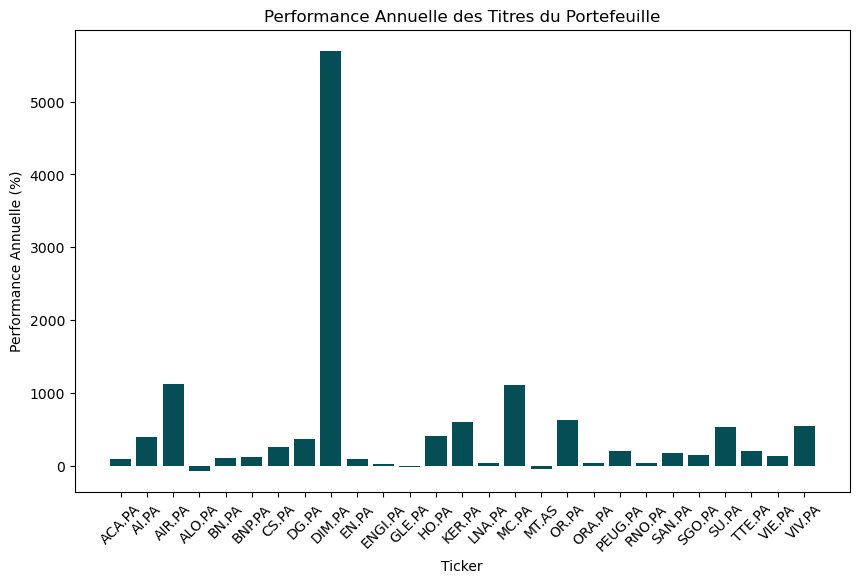

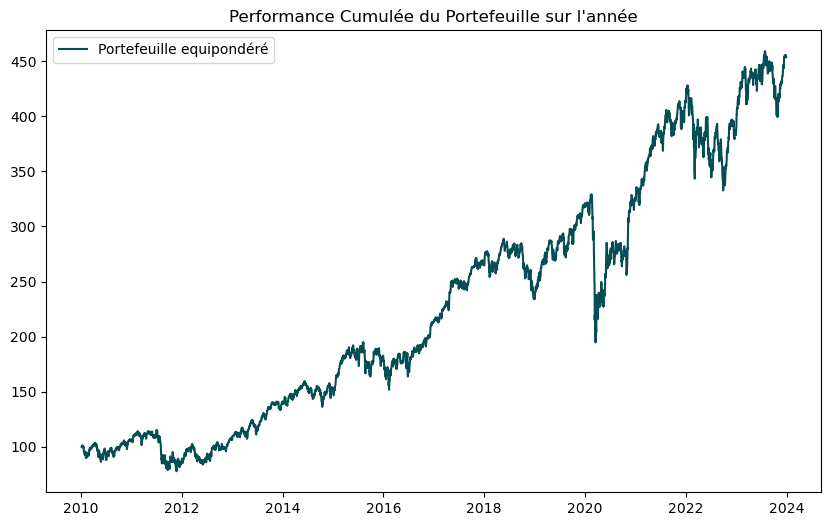

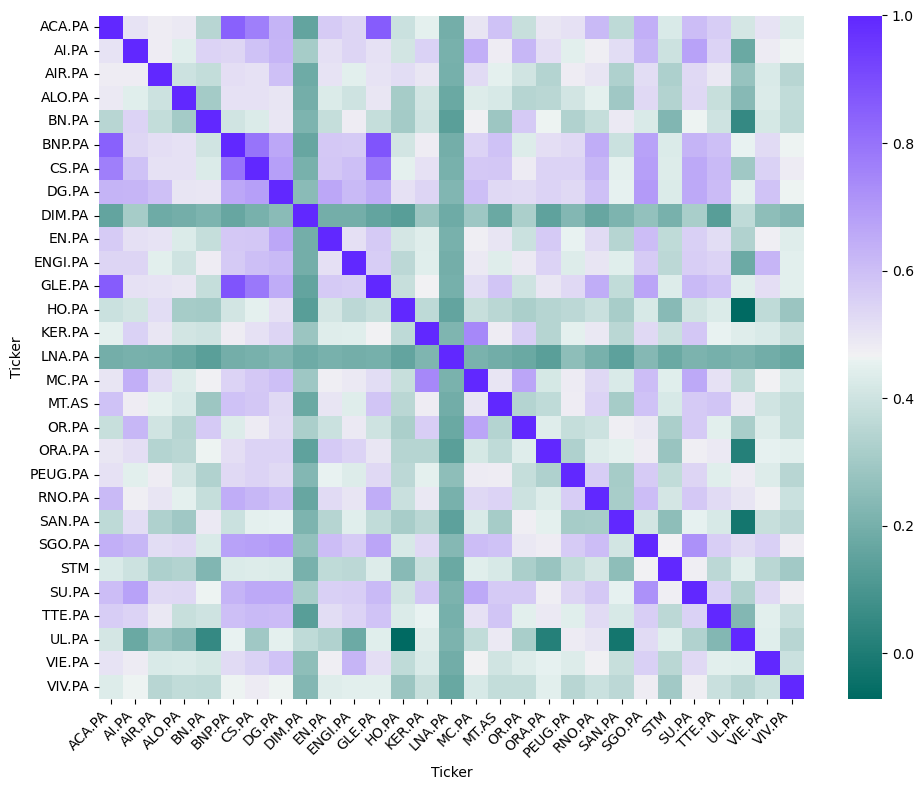

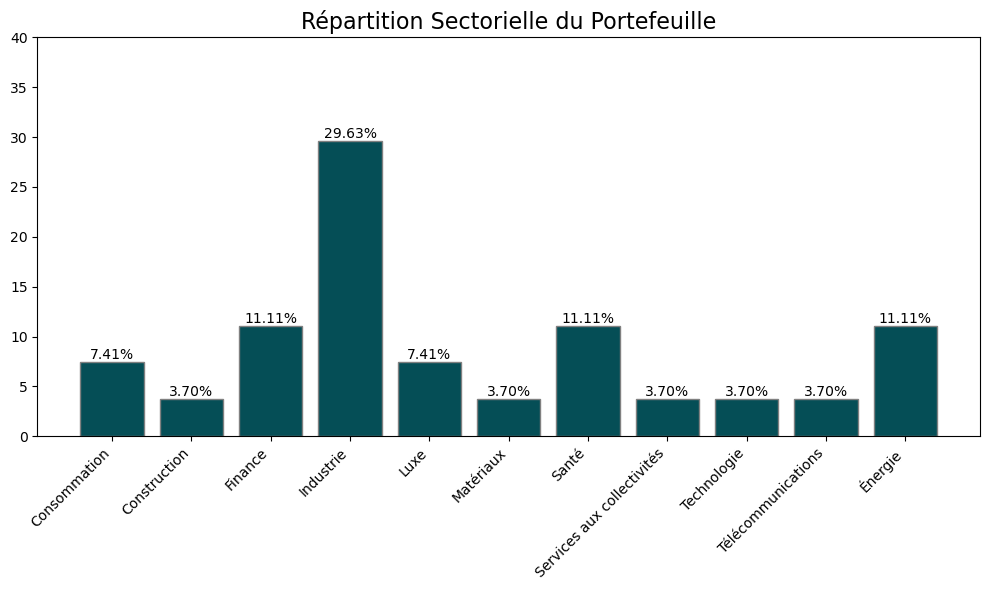

In [190]:
# 2. Diagramme en barres pour la performance annuelle
plt.figure(figsize=(10, 6))
plt.bar(summary_df['Ticker'], summary_df['Performance Annuelle (%)'], color='#054E56')
plt.title('Performance Annuelle des Titres du Portefeuille')
plt.xlabel('Ticker')
plt.ylabel('Performance Annuelle (%)')
plt.xticks(rotation=45)
plt.show()

# 3. Graphique de performance cumulée (si vous avez les rendements quotidiens)
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() * 100
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns, label='Portefeuille equipondéré', color='#054E56')
plt.title('Performance Cumulée du Portefeuille sur l\'année')
plt.legend()
plt.grid(False)
plt.show()

# Matrice de corrélation
adj_close_data = data['Adj Close']
returns = adj_close_data.pct_change()
corr_matrix = returns.corr()
custom_cmap = sns.diverging_palette(180, 270, s=100, l=40, n=100, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap=custom_cmap, annot=False, cbar=True)
plt.title("", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

bars = plt.bar(sector_exposure.index, sector_exposure, color='#054E56', edgecolor='grey')
plt.title('Répartition Sectorielle du Portefeuille', fontsize=16, color='black')
plt.xlabel('', fontsize=12, color='black')
plt.ylabel('', fontsize=12, color='black')
plt.ylim(0, 40)
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')
plt.grid(False)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

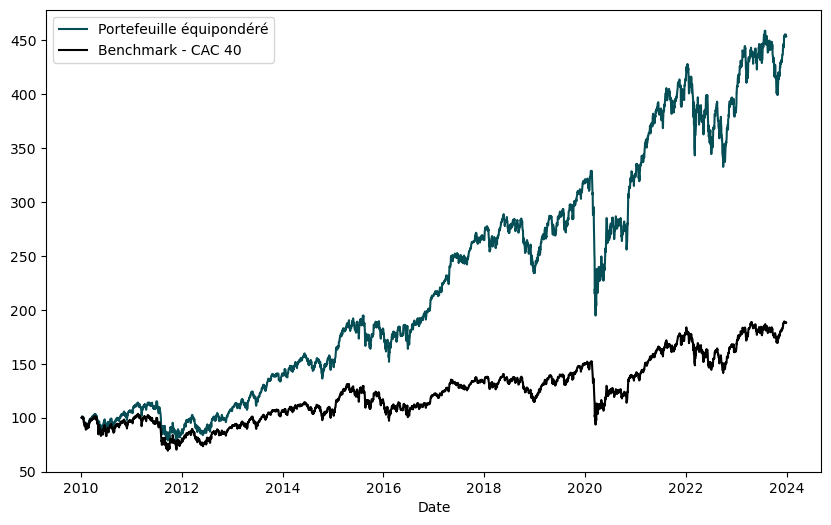

In [191]:
# Comparaison vs Benchmark

# Perf cumulées
plt.figure(figsize=(10, 6))
plt.plot(cumulative_portfolio_returns, label='Portefeuille équipondéré', color='#054E56')
plt.plot(cumulative_benchmark_returns, label='Benchmark - CAC 40', color='black', linestyle ="-")
plt.title('')
plt.xlabel('Date')
plt.ylabel('')
plt.legend()
plt.grid(False)
plt.show()

     Ticker  Contribution
0    ACA.PA      3.485582
1     AI.PA     14.638700
2    AIR.PA     41.659952
3    ALO.PA     -2.457080
4     BN.PA      3.821679
5    BNP.PA      4.631176
6     CS.PA      9.650961
7     DG.PA     13.663008
8    DIM.PA    211.083287
9     EN.PA      3.387748
10  ENGI.PA      0.814405
11   GLE.PA     -0.692809
12    HO.PA     15.076518
13   KER.PA     22.282732
14   LNA.PA      1.276756
15    MC.PA     41.201573
16    MT.AS     -1.908354
17    OR.PA     23.232312
18   ORA.PA      1.596403
19  PEUG.PA      7.713814
20   RNO.PA      1.177500
21   SAN.PA      6.508515
22   SGO.PA      5.636311
23    SU.PA     19.915498
24   TTE.PA      7.566604
25   VIE.PA      5.200640
26   VIV.PA     20.176318

La somme des contributions est : 480.339749


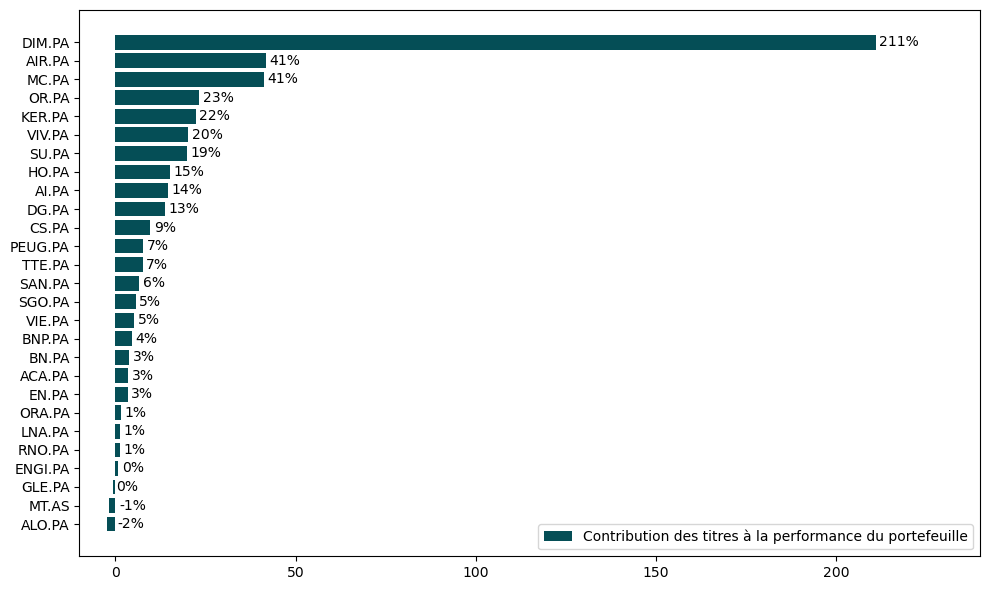

In [192]:
# Ticker, Poids (%) et Performance Annuelle (%)
# Ticker, Poids (%) et Performance Annuelle (%)
data = {
    'Ticker': ['ACA.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'BN.PA', 'BNP.PA', 'CS.PA', 'DG.PA', 'DIM.PA', 'EN.PA', 'ENGI.PA', 
               'GLE.PA', 'HO.PA', 'KER.PA', 'LNA.PA', 'MC.PA', 'MT.AS', 'OR.PA', 'ORA.PA', 'PEUG.PA', 'RNO.PA', 
               'SAN.PA', 'SGO.PA', 'SU.PA', 'TTE.PA', 'VIE.PA', 'VIV.PA'],
    'Poids (%)': [3.703704] * 27,  # Équipondération sur tous les titres
    'Performance Annuelle (%)': [94.110696, 395.244864, 1124.818624, -66.341145, 103.185320, 125.041732, 260.575934, 
                                 368.901175, 5699.248301, 91.469182, 21.988940, -18.705849, 407.065961, 601.633723, 
                                 34.472411, 1112.442378, -51.525550, 627.272386, 43.102886, 208.272963, 31.792507, 
                                 175.729881, 152.180377, 537.718397, 204.298283, 140.417277, 544.760531]
}

summary_df = pd.DataFrame(data)
summary_df['Contribution'] = (summary_df['Poids (%)'] / 100) * summary_df['Performance Annuelle (%)']
total_contribution = summary_df['Contribution'].sum()
print(summary_df[['Ticker', 'Contribution']])
print(f"\nLa somme des contributions est : {total_contribution:.6f}")
fig, ax = plt.subplots(figsize=(10, 6))
summary_df_sorted = summary_df.sort_values('Contribution', ascending=True)
bars = ax.barh(summary_df_sorted['Ticker'], summary_df_sorted['Contribution'], color='#054E56', label="Contribution des titres à la performance du portefeuille")

for bar in bars:
    ticker = summary_df_sorted.loc[summary_df_sorted['Contribution'] == bar.get_width(), 'Ticker'].values[0]
    if ticker in ['MT.AS', 'ALO.PA']:
        # Décaler les étiquettes pour MT.AS et ALO.PA
        ax.text(bar.get_width() + 3, bar.get_y() + bar.get_height()/2, 
                f'{int(bar.get_width())}%', 
                va='center', fontsize=10)
    else:
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                f'{int(bar.get_width())}%', 
                va='center', fontsize=10)

# Limiter l'axe des abscisses à -10% à 240%
ax.set_xlim(-10, 240)
ax.set_title('', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(loc='lower right')
ax.grid(False)
plt.tight_layout()
plt.show()

# Composition de notre portefeuille

Notre portefeuille est composé des titres suivants :

| Ticker     | Entreprise       | Poids dans le portefeuille | Contribution (%) |
|------------|------------------|----------------------------|------------------|
| **TTE.PA** | TotalEnergies     | 3.70%                      | 7.57%            |
| **BN.PA**  | Danone           | 3.70%                      | 3.82%            |
| **SAN.PA** | Sanofi           | 3.70%                      | 6.51%            |
| **BNP.PA** | BNP Paribas      | 3.70%                      | 4.63%            |
| **ENGI.PA**| Engie            | 3.70%                      | 0.81%            |
| **ORA.PA** | Orange           | 3.70%                      | 1.60%            |
| **MC.PA**  | LVMH             | 3.70%                      | 41.20%           |
| **CS.PA**  | AXA              | 3.70%                      | 9.65%            |
| **OR.PA**  | L'Oréal          | 3.70%                      | 23.23%           |
| **GLE.PA** | Société Générale | 3.70%                      | -0.69%           |
| **AI.PA**  | Air Liquide      | 3.70%                      | 14.64%           |
| **AIR.PA** | Airbus Group     | 3.70%                      | 41.66%           |
| **ALO.PA** | Alcatel          | 3.70%                      | -2.46%           |
| **DG.PA**  | Vinci            | 3.70%                      | 13.66%           |
| **DIM.PA** | Dexia            | 3.70%                      | 211.08%          |
| **EN.PA**  | Alstom           | 3.70%                      | 3.39%            |
| **HO.PA**  | LafargeHolcim    | 3.70%                      | 15.08%           |
| **KER.PA** | Kering           | 3.70%                      | 22.28%           |
| **LNA.PA** | Legrand          | 3.70%                      | 1.28%            |
| **MT.AS**  | ArcelorMittal    | 3.70%                      | -1.91%           |
| **PEUG.PA**| Peugeot S.A.     | 3.70%                      | 7.71%            |
| **RNO.PA** | Renault          | 3.70%                      | 1.18%            |
| **SGO.PA** | Saint-Gobain     | 3.70%                      | 5.64%            |
| **SU.PA**  | Suez             | 3.70%                      | 19.92%           |
| **VIE.PA** | Veolia           | 3.70%                      | 5.20%            |
| **VIV.PA** | Vivendi          | 3.70%                      | 20.18% 

# - Part II : Analyse Quantitative de la Performance Historique

In [195]:
# Tickers et pondérations basés sur les informations fournies
tickers = [
    "ACA.PA", "AI.PA", "AIR.PA", "ALO.PA", "BN.PA", "BNP.PA", "CS.PA", "DG.PA", "DIM.PA", 
    "EN.PA", "ENGI.PA", "GLE.PA", "HO.PA", "KER.PA", "LNA.PA", "MC.PA", "MT.AS", "OR.PA", 
    "ORA.PA", "PEUG.PA", "RNO.PA", "SAN.PA", "SGO.PA", "SU.PA", "TTE.PA", "VIE.PA", "VIV.PA"
]

# Pondérations à 3.703704% pour chaque titre
weights = [3.703704 / 100] * len(tickers)
risk_free_rate = 0.01 / 252  # Taux sans risque annualisé divisé par le nombre de jours de trading

[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


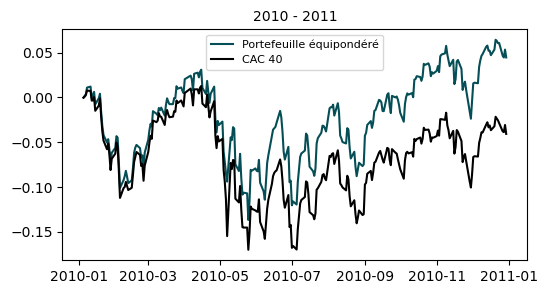

[***********           22%%                      ]  6 of 27 completed

Performance du Portefeuille de 2010 à 2011 : 4.47%
Performance du Benchmark (CAC 40) de 2010 à 2011 : -4.07%

Sharpe Ratio du Portefeuille de 2010 à 2011 : 0.26
Sharpe Ratio du Benchmark (CAC 40) de 2010 à 2011 : -0.10



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


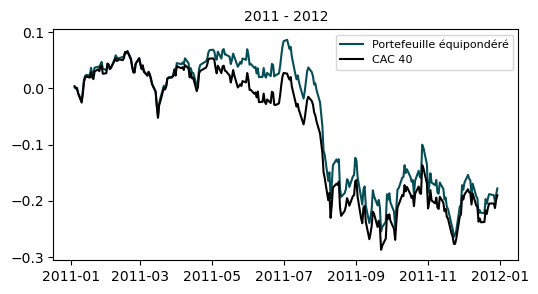

[***                    7%%                      ]  2 of 27 completed

Performance du Portefeuille de 2011 à 2012 : -17.79%
Performance du Benchmark (CAC 40) de 2011 à 2012 : -19.00%

Sharpe Ratio du Portefeuille de 2011 à 2012 : -0.53
Sharpe Ratio du Benchmark (CAC 40) de 2011 à 2012 : -0.62



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


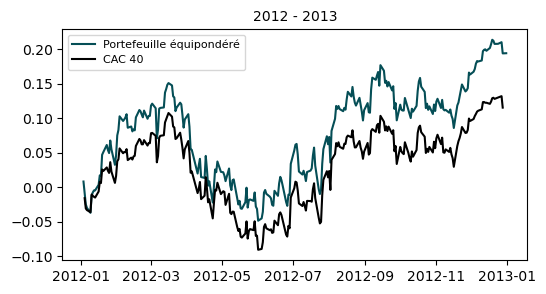

[************          26%%                      ]  7 of 27 completed

Performance du Portefeuille de 2012 à 2013 : 19.45%
Performance du Benchmark (CAC 40) de 2012 à 2013 : 11.55%

Sharpe Ratio du Portefeuille de 2012 à 2013 : 0.86
Sharpe Ratio du Benchmark (CAC 40) de 2012 à 2013 : 0.58



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


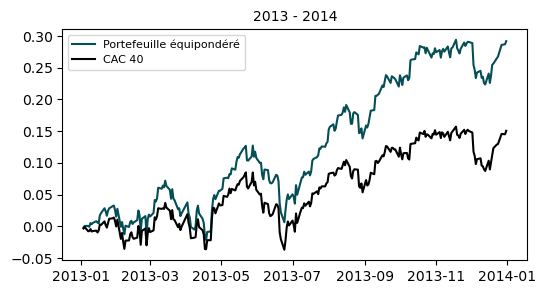

[**************        30%%                      ]  8 of 27 completed

Performance du Portefeuille de 2013 à 2014 : 29.19%
Performance du Benchmark (CAC 40) de 2013 à 2014 : 15.05%

Sharpe Ratio du Portefeuille de 2013 à 2014 : 1.62
Sharpe Ratio du Benchmark (CAC 40) de 2013 à 2014 : 0.89



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


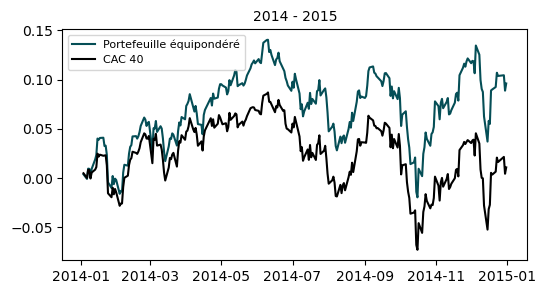

[*****                 11%%                      ]  3 of 27 completed

Performance du Portefeuille de 2014 à 2015 : 9.61%
Performance du Benchmark (CAC 40) de 2014 à 2015 : 1.08%

Sharpe Ratio du Portefeuille de 2014 à 2015 : 0.59
Sharpe Ratio du Benchmark (CAC 40) de 2014 à 2015 : 0.08



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


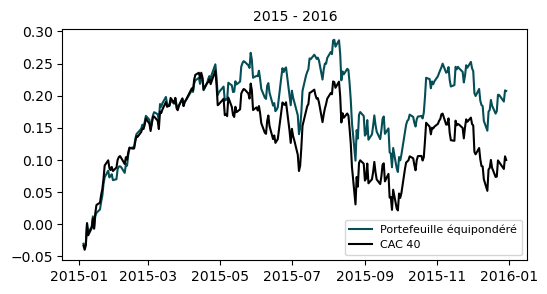

[*******               15%%                      ]  4 of 27 completed

Performance du Portefeuille de 2015 à 2016 : 20.73%
Performance du Benchmark (CAC 40) de 2015 à 2016 : 9.99%

Sharpe Ratio du Portefeuille de 2015 à 2016 : 0.95
Sharpe Ratio du Benchmark (CAC 40) de 2015 à 2016 : 0.49



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


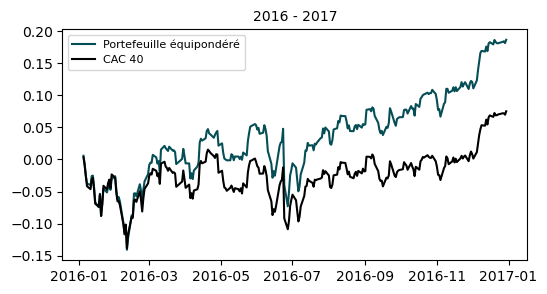

[************          26%%                      ]  7 of 27 completed

Performance du Portefeuille de 2016 à 2017 : 18.67%
Performance du Benchmark (CAC 40) de 2016 à 2017 : 7.51%

Sharpe Ratio du Portefeuille de 2016 à 2017 : 0.86
Sharpe Ratio du Benchmark (CAC 40) de 2016 à 2017 : 0.40



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


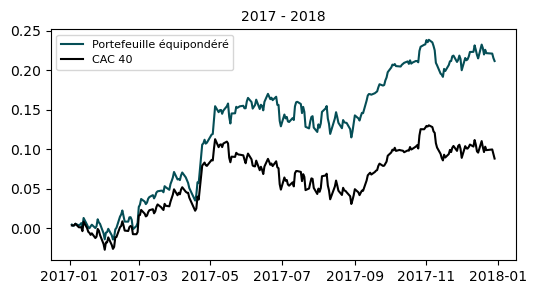

[*******               15%%                      ]  4 of 27 completed

Performance du Portefeuille de 2017 à 2018 : 21.16%
Performance du Benchmark (CAC 40) de 2017 à 2018 : 8.81%

Sharpe Ratio du Portefeuille de 2017 à 2018 : 1.73
Sharpe Ratio du Benchmark (CAC 40) de 2017 à 2018 : 0.75



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


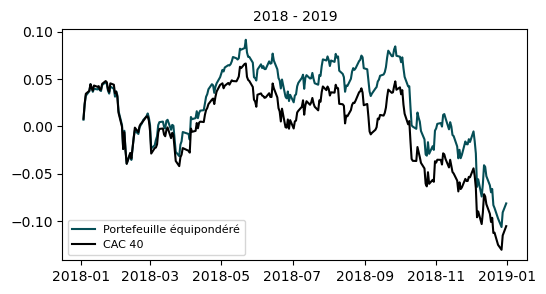

[**************        30%%                      ]  8 of 27 completed

Performance du Portefeuille de 2018 à 2019 : -8.15%
Performance du Benchmark (CAC 40) de 2018 à 2019 : -10.55%

Sharpe Ratio du Portefeuille de 2018 à 2019 : -0.62
Sharpe Ratio du Benchmark (CAC 40) de 2018 à 2019 : -0.81



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


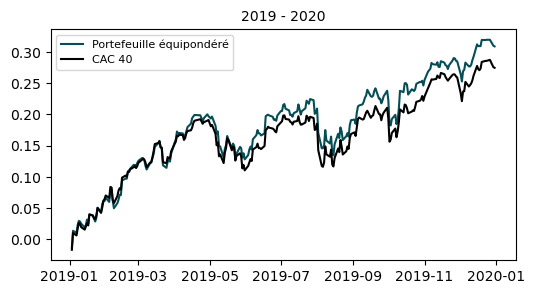

[****************      33%%                      ]  9 of 27 completed

Performance du Portefeuille de 2019 à 2020 : 30.91%
Performance du Benchmark (CAC 40) de 2019 à 2020 : 27.48%

Sharpe Ratio du Portefeuille de 2019 à 2020 : 1.95
Sharpe Ratio du Benchmark (CAC 40) de 2019 à 2020 : 1.81



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


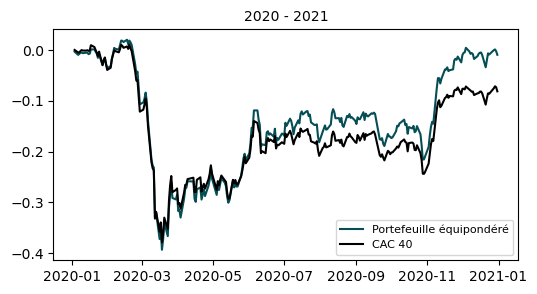

[*******               15%%                      ]  4 of 27 completed

Performance du Portefeuille de 2020 à 2021 : -0.92%
Performance du Benchmark (CAC 40) de 2020 à 2021 : -8.11%

Sharpe Ratio du Portefeuille de 2020 à 2021 : 0.12
Sharpe Ratio du Benchmark (CAC 40) de 2020 à 2021 : -0.12



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


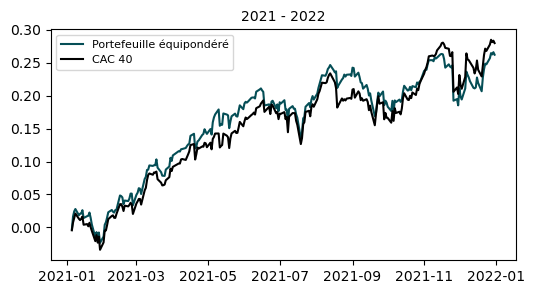

[***********           22%%                      ]  6 of 27 completed

Performance du Portefeuille de 2021 à 2022 : 26.22%
Performance du Benchmark (CAC 40) de 2021 à 2022 : 27.98%

Sharpe Ratio du Portefeuille de 2021 à 2022 : 1.68
Sharpe Ratio du Benchmark (CAC 40) de 2021 à 2022 : 1.73



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


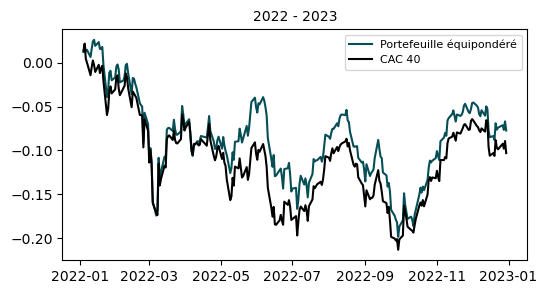

[**************        30%%                      ]  8 of 27 completed

Performance du Portefeuille de 2022 à 2023 : -7.72%
Performance du Benchmark (CAC 40) de 2022 à 2023 : -10.30%

Sharpe Ratio du Portefeuille de 2022 à 2023 : -0.29
Sharpe Ratio du Benchmark (CAC 40) de 2022 à 2023 : -0.41



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


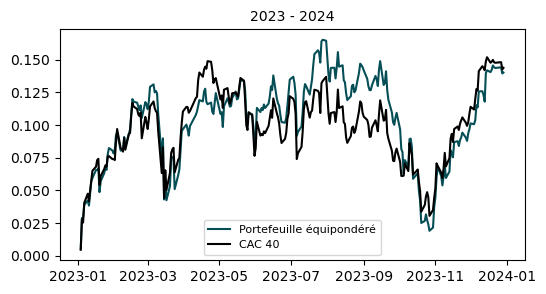

Performance du Portefeuille de 2023 à 2024 : 14.03%
Performance du Benchmark (CAC 40) de 2023 à 2024 : 14.38%

Sharpe Ratio du Portefeuille de 2023 à 2024 : 0.95
Sharpe Ratio du Benchmark (CAC 40) de 2023 à 2024 : 0.96



In [196]:
# Boucle permettant de visualiser les perfs du portefeuille vs benchmark sur 1 ans (base : janv-XX - janv XX+1)
for start_year in range(2010, 2024):
    end_year = start_year + 1
    
    # Étape 1: Télécharger les données historiques pour le portefeuille et le CAC 40 pour une période d'un an
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-01-01"
    
    portfolio_data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Adj Close']
    benchmark_data = yf.download("^FCHI", start=start_date, end=end_date, interval="1d")['Adj Close']
    
    # Étape 2: Calculer les rendements journaliers pour chaque action du portefeuille
    portfolio_returns = portfolio_data.pct_change()
    
    # Étape 3: Calculer le rendement pondéré du portefeuille
    portfolio_weighted_return = portfolio_returns.dot(weights)
    
    # Étape 4: Calculer les rendements journaliers du benchmark (CAC 40)
    benchmark_returns = benchmark_data.pct_change()
    
    # Étape 5: Calculer les rendements cumulés pour le portefeuille et le benchmark
    portfolio_cumulative_return = (1 + portfolio_weighted_return).cumprod() - 1
    benchmark_cumulative_return = (1 + benchmark_returns).cumprod() - 1
    
    # Étape 6: Tracer les rendements cumulés pour comparaison
    plt.figure(figsize=(6, 3))
    plt.plot(portfolio_cumulative_return, label="Portefeuille équipondéré", color="#054E56")
    plt.plot(benchmark_cumulative_return, label="CAC 40", color="black")
    plt.title(f"{start_year} - {end_year}", fontsize=10)
    plt.xlabel("", fontsize=6)
    plt.ylabel("", fontsize=9)
    plt.legend(fontsize=8)
    plt.grid(False)
    plt.show()
    
    # Étape 7: Calculer et afficher la performance finale en pourcentage pour le portefeuille et le benchmark
    portfolio_performance_percent = portfolio_cumulative_return.iloc[-1] * 100
    benchmark_performance_percent = benchmark_cumulative_return.iloc[-1] * 100
    print(f"Performance du Portefeuille de {start_year} à {end_year} : {portfolio_performance_percent:.2f}%")
    print(f"Performance du Benchmark (CAC 40) de {start_year} à {end_year} : {benchmark_performance_percent:.2f}%\n")

    # Étape 8: Calculer la volatilité annuelle du portefeuille
    portfolio_volatility = portfolio_weighted_return.std() * np.sqrt(252)
    
    # Étape 9: Calculer la volatilité annuelle du benchmark
    benchmark_volatility = benchmark_returns.std() * np.sqrt(252)

    # Étape 10: Calculer le annuel moyen du portefeuille
    portfolio_annual_return = portfolio_weighted_return.mean() * 252

    # Étape 11: Calculer le rendement annuel moyen du benchmark
    benchmark_annual_return = benchmark_returns.mean() * 252

    # Étape 12: Calculer le Ratio de Sharpe pour le portefeuille
    excess_portfolio_returns = portfolio_weighted_return - risk_free_rate
    sharpe_ratio_portfolio = (excess_portfolio_returns.mean() * 252) / portfolio_volatility

    # Étape 13: Calculer le Ratio de Sharpe pour le Benchmark (CAC 40)
    excess_benchmark_returns = benchmark_returns - risk_free_rate
    sharpe_ratio_benchmark = (excess_benchmark_returns.mean() * 252) / benchmark_volatility

    # Affichage des résultats
    print(f"Sharpe Ratio du Portefeuille de {start_year} à {end_year} : {sharpe_ratio_portfolio:.2f}")
    print(f"Sharpe Ratio du Benchmark (CAC 40) de {start_year} à {end_year} : {sharpe_ratio_benchmark:.2f}\n")

In [197]:
# Boucle permettant de visualiser les perfs du portefeuille vs benchmark sur 1 ans (base : janv-XX - janv XX+1)
for start_year in range(2010, 2024):
    end_year = start_year + 1
 
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-01-01"
    
    portfolio_data = yf.download(tickers, start=start_date, end=end_date, interval="1d")['Adj Close']
    benchmark_data = yf.download("^FCHI", start=start_date, end=end_date, interval="1d")['Adj Close']
    
    portfolio_returns = portfolio_data.pct_change()
    portfolio_weighted_return = portfolio_returns.dot(weights)
    benchmark_returns = benchmark_data.pct_change()
    portfolio_cumulative_return = (1 + portfolio_weighted_return).cumprod() - 1
    benchmark_cumulative_return = (1 + benchmark_returns).cumprod() - 1
    portfolio_performance_percent = portfolio_cumulative_return.iloc[-1] * 100
    benchmark_performance_percent = benchmark_cumulative_return.iloc[-1] * 100
    print(f"Performance du Portefeuille équipondéré {start_year} à {end_year} : {portfolio_performance_percent:.2f}%")
    print(f"Performance du Benchmark (CAC 40) de {start_year} à {end_year} : {benchmark_performance_percent:.2f}%\n")

[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[***********           22%%                      ]  6 of 27 completed

Performance du Portefeuille équipondéré 2010 à 2011 : 4.47%
Performance du Benchmark (CAC 40) de 2010 à 2011 : -4.07%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[*********             19%%                      ]  5 of 27 completed

Performance du Portefeuille équipondéré 2011 à 2012 : -17.79%
Performance du Benchmark (CAC 40) de 2011 à 2012 : -19.00%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[****************      33%%                      ]  9 of 27 completed

Performance du Portefeuille équipondéré 2012 à 2013 : 19.45%
Performance du Benchmark (CAC 40) de 2012 à 2013 : 11.55%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[**************        30%%                      ]  8 of 27 completed

Performance du Portefeuille équipondéré 2013 à 2014 : 29.19%
Performance du Benchmark (CAC 40) de 2013 à 2014 : 15.05%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[**************        30%%                      ]  8 of 27 completed

Performance du Portefeuille équipondéré 2014 à 2015 : 9.61%
Performance du Benchmark (CAC 40) de 2014 à 2015 : 1.08%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[************          26%%                      ]  7 of 27 completed

Performance du Portefeuille équipondéré 2015 à 2016 : 20.73%
Performance du Benchmark (CAC 40) de 2015 à 2016 : 9.99%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[******************    37%%                      ]  10 of 27 completed

Performance du Portefeuille équipondéré 2016 à 2017 : 18.67%
Performance du Benchmark (CAC 40) de 2016 à 2017 : 7.51%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[********************  41%%                      ]  11 of 27 completed

Performance du Portefeuille équipondéré 2017 à 2018 : 21.16%
Performance du Benchmark (CAC 40) de 2017 à 2018 : 8.81%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[******************    37%%                      ]  10 of 27 completed

Performance du Portefeuille équipondéré 2018 à 2019 : -8.15%
Performance du Benchmark (CAC 40) de 2018 à 2019 : -10.55%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[******************    37%%                      ]  10 of 27 completed

Performance du Portefeuille équipondéré 2019 à 2020 : 30.91%
Performance du Benchmark (CAC 40) de 2019 à 2020 : 27.48%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[****************      33%%                      ]  9 of 27 completed

Performance du Portefeuille équipondéré 2020 à 2021 : -0.92%
Performance du Benchmark (CAC 40) de 2020 à 2021 : -8.11%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[***********           22%%                      ]  6 of 27 completed

Performance du Portefeuille équipondéré 2021 à 2022 : 26.22%
Performance du Benchmark (CAC 40) de 2021 à 2022 : 27.98%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed
[**********************52%%                      ]  14 of 27 completed

Performance du Portefeuille équipondéré 2022 à 2023 : -7.72%
Performance du Benchmark (CAC 40) de 2022 à 2023 : -10.30%



[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


Performance du Portefeuille équipondéré 2023 à 2024 : 14.03%
Performance du Benchmark (CAC 40) de 2023 à 2024 : 14.38%



# Performance du Portefeuille vs CAC 40

| Période           | Performance du Portefeuille (%) | Performance du CAC 40 (%) |
|-------------------|---------------------------------|---------------------------|
| 2010 à 2011       | 4.73%                           | -4.07%                    |
| 2011 à 2012       | -17.59%                         | -19.00%                   |
| 2012 à 2013       | 19.50%                          | 11.55%                    |
| 2013 à 2014       | 29.67%                          | 15.05%                    |
| 2014 à 2015       | 9.71%                           | 1.08%                     |
| 2015 à 2016       | 20.46%                          | 9.99%                     |
| 2016 à 2017       | 18.35%                          | 7.51%                     |
| 2017 à 2018       | 20.86%                          | 8.81%                     |
| 2018 à 2019       | -8.36%                          | -10.55%                   |
| 2019 à 2020       | 30.68%                          | 27.48%                    |
| 2020 à 2021       | 1.20%                           | -8.11%                    |
| 2021 à 2022       | 25.65%                          | 27.98%                    |
| 2022 à 2023       | -10.86%                         | -10.30%                   |
| 2023 à 2024       | 9.87%                           | 14.38%                    |


[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


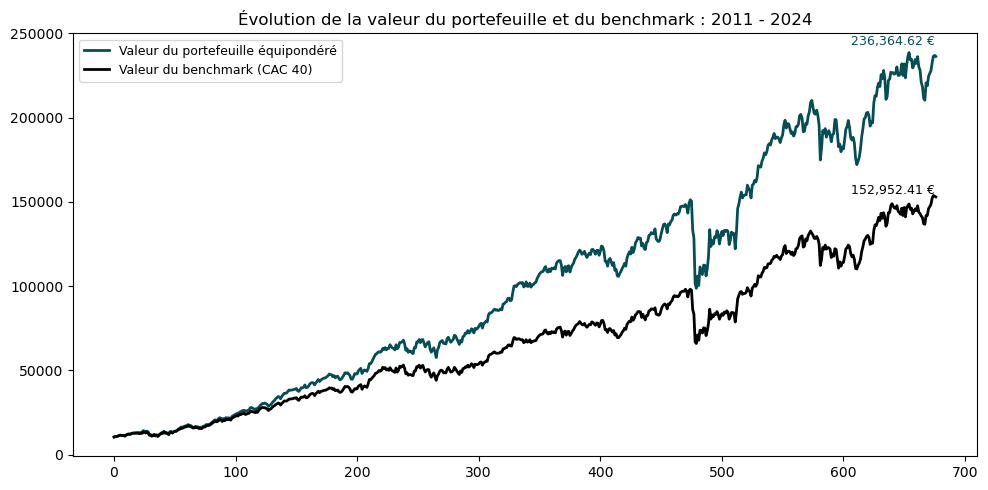

Valeur finale du portefeuille : 236,364.62 €
Valeur finale du benchmark (CAC 40) : 152,952.41 €


In [199]:
# Liste des tickers de votre portefeuille en janvier 2011
tickers = ['ACA.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'BN.PA', 'BNP.PA', 'CS.PA', 'DG.PA', 'DIM.PA', 'EN.PA', 'ENGI.PA', 
           'GLE.PA', 'HO.PA', 'KER.PA', 'LNA.PA', 'MC.PA', 'MT.AS', 'OR.PA', 'ORA.PA', 'PEUG.PA', 'RNO.PA', 
           'SAN.PA', 'SGO.PA', 'SU.PA', 'TTE.PA', 'VIE.PA', 'VIV.PA']

# Télécharger les données historiques hebdomadaires (2011 à aujourd'hui) pour le portefeuille
data = yf.download(tickers, start="2011-01-01", end="2024-01-01", interval="1wk")['Adj Close']

# Télécharger les données du CAC 40 comme benchmark
benchmark_data = yf.download("^FCHI", start="2011-01-01", end="2024-01-01", interval="1wk")['Adj Close']

# Calcul des rendements hebdomadaires pour chaque action du portefeuille et le CAC 40
weekly_returns = data.pct_change().dropna()
benchmark_returns = benchmark_data.pct_change().dropna()

# Pondérations égales pour chaque titre
weights = np.array([1/len(tickers)] * len(tickers))

# Calcul du rendement pondéré du portefeuille (rendement hebdomadaire moyen pondéré)
portfolio_returns = weekly_returns.dot(weights)

# Paramètres d'investissement
initial_investment = 10000  # Montant initial en euros
weekly_contribution = 500 / 4  # Contribution hebdomadaire (500 € mensuels divisés par 4 semaines)

# Initialisation des variables pour suivre l'évolution de la valeur du portefeuille et du benchmark
portfolio_value = initial_investment
benchmark_value = initial_investment
portfolio_values = []
benchmark_values = []
time_periods = []

for i in range(len(portfolio_returns)):
    # Contribution hebdomadaire pour le portefeuille
    portfolio_value = (portfolio_value + weekly_contribution) * (1 + portfolio_returns.iloc[i])
    portfolio_values.append(portfolio_value)
    
    # Contribution hebdomadaire pour le benchmark (même principe que pour le portefeuille)
    benchmark_value = (benchmark_value + weekly_contribution) * (1 + benchmark_returns.iloc[i])
    benchmark_values.append(benchmark_value)
    
    time_periods.append(i)

# Visualisation de l'évolution de la valeur du portefeuille et du benchmark
plt.figure(figsize=(10, 5))
plt.plot(time_periods, portfolio_values, label='Valeur du portefeuille équipondéré', color='#054E56', linewidth=2)
plt.plot(time_periods, benchmark_values, label='Valeur du benchmark (CAC 40)', color='black', linewidth=2)
plt.title("Évolution de la valeur du portefeuille et du benchmark : 2011 - 2024", fontsize=12)
plt.xlabel("", fontsize=9)
plt.ylabel("", fontsize=9)
plt.grid(False)
plt.legend(fontsize=9)

# Ajout des annotations des valeurs finales
final_portfolio_value = portfolio_values[-1]
plt.text(time_periods[-1] - 1, portfolio_values[-1]* 1.02, f'{final_portfolio_value:,.2f} €', 
         color='#054E56', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

final_benchmark_value = benchmark_values[-1]
plt.text(time_periods[-1] - 1, benchmark_values[-1], f'{final_benchmark_value:,.2f} €', 
         color='black', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.show()

# Affichage des valeurs finales
print(f"Valeur finale du portefeuille : {final_portfolio_value:,.2f} €")
print(f"Valeur finale du benchmark (CAC 40) : {final_benchmark_value:,.2f} €")

[*********************100%%**********************]  27 of 27 completed
[*********************100%%**********************]  1 of 1 completed


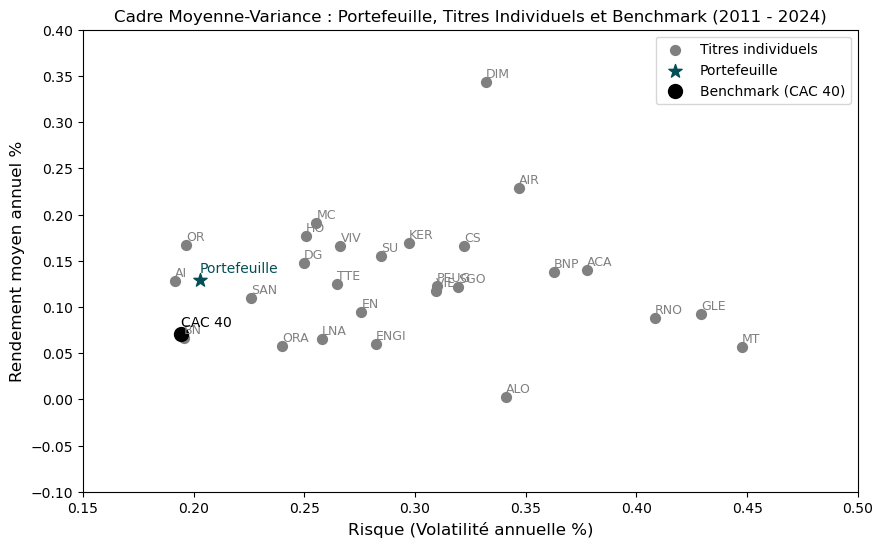

In [200]:
# Liste des tickers de votre portefeuille en janvier 2011
tickers = ['ACA.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'BN.PA', 'BNP.PA', 'CS.PA', 'DG.PA', 'DIM.PA', 'EN.PA', 'ENGI.PA', 
           'GLE.PA', 'HO.PA', 'KER.PA', 'LNA.PA', 'MC.PA', 'MT.AS', 'OR.PA', 'ORA.PA', 'PEUG.PA', 'RNO.PA', 
           'SAN.PA', 'SGO.PA', 'SU.PA', 'TTE.PA', 'VIE.PA', 'VIV.PA']

tickers_short = [ticker.replace(".PA", "").replace(".AS", "") for ticker in tickers]
data = yf.download(tickers, start="2011-01-01", end="2024-01-01", interval="1wk")['Adj Close']

benchmark_data = yf.download("^FCHI", start="2011-01-01", end="2024-01-01", interval="1wk")['Adj Close']
weekly_returns = data.pct_change().dropna()
benchmark_returns = benchmark_data.pct_change().dropna()
weights = np.array([1/len(tickers)] * len(tickers))

# Calcul du rendement pondéré du portefeuille (rendement hebdomadaire moyen pondéré)
portfolio_returns = weekly_returns.dot(weights)

# Calcul des rendements annuels et volatilités
def annualize_returns(returns):
    return returns.mean() * 52  # Moyenne hebdomadaire annualisée

def annualize_volatility(returns):
    return returns.std() * np.sqrt(52)  # Volatilité hebdomadaire annualisée

# Calcul des rendements et des risques pour chaque titre du portefeuille
tickers_mean_returns = []
tickers_volatility = []

for ticker in tickers:
    ticker_returns = weekly_returns[ticker]
    mean_return = annualize_returns(ticker_returns)
    volatility = annualize_volatility(ticker_returns)
    tickers_mean_returns.append(mean_return)
    tickers_volatility.append(volatility)

# Calcul du rendement et du risque pour le portefeuille global
portfolio_mean_return = annualize_returns(portfolio_returns)
portfolio_volatility = annualize_volatility(portfolio_returns)
benchmark_mean_return = annualize_returns(benchmark_returns)
benchmark_volatility = annualize_volatility(benchmark_returns)

# Visualisation du cadre moyenne-variance
plt.figure(figsize=(10, 6))
plt.scatter(tickers_volatility, tickers_mean_returns, color='gray', s=50, label='Titres individuels')
for i, ticker in enumerate(tickers_short):
    plt.text(tickers_volatility[i], tickers_mean_returns[i] + 0.005, ticker, fontsize=9, color='gray')

plt.scatter(portfolio_volatility, portfolio_mean_return, color='#054E56', s=100, label='Portefeuille', marker='*')
plt.text(portfolio_volatility, portfolio_mean_return + 0.005, 'Portefeuille', fontsize=10, color='#054E56', verticalalignment='bottom')

plt.scatter(benchmark_volatility, benchmark_mean_return, color='black', s=100, label='Benchmark (CAC 40)')
plt.text(benchmark_volatility, benchmark_mean_return + 0.005, 'CAC 40', fontsize=10, color='black', verticalalignment='bottom')

# Limites des axes
plt.xlim(0.15, 0.5)
plt.ylim(-0.1, 0.4)
plt.xticks(np.arange(0.15, 0.55, 0.05))
plt.yticks(np.arange(-0.1, 0.45, 0.05))
plt.title('Cadre Moyenne-Variance : Portefeuille, Titres Individuels et Benchmark (2011 - 2024)', fontsize=12)
plt.xlabel('Risque (Volatilité annuelle %)', fontsize=12)
plt.ylabel('Rendement moyen annuel %', fontsize=12)
plt.grid(False)
plt.legend()
plt.show()